<a href="https://colab.research.google.com/github/AdityaPunetha/Insurance-Cost-Predictor/blob/main/Insurance_Cost_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

## Step 1: Download and explore the data

Let us begin by downloading the data. We'll use the `download_url` function from PyTorch to get the data as a CSV (comma-separated values) file. 

In [2]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
DATA_FILENAME = "insurance.csv"
download_url(DATASET_URL, ".")

  0%|          | 0/55628 [00:00<?, ?it/s]

In [3]:
dataframe_raw = pd.read_csv(DATA_FILENAME)
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
num_rows = len(dataframe_raw.axes[0])
print(num_rows)

1338


In [5]:
num_cols = len(dataframe_raw.axes[1])
print(num_cols)

7


In [6]:
input_cols = ["age", "sex", "bmi", "children", "smoker", "region"]

In [7]:
categorical_cols = ["sex", "smoker", "region"]

In [8]:
output_cols = ["charges"]

## Step 2: Prepare the dataset for training

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. If you've filled out `input_cols`, `categorial_cols` and `output_cols` correctly, this following function will perform the conversion to numpy arrays.

In [9]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype("category").cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy(dtype="float32")
    targets_array = dataframe1[output_cols].to_numpy(dtype="float32")
    return inputs_array, targets_array

In [10]:
inputs_array, targets_array = dataframe_to_arrays(dataframe_raw)
inputs_array, targets_array

(array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
        [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
        [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
        ...,
        [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
        [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
        [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]], dtype=float32),
 array([[16884.924 ],
        [ 1725.5522],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.36  ]], dtype=float32))

**Q: Convert the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.**

In [11]:
inputs = torch.from_numpy(inputs_array)
targets = torch.from_numpy(targets_array)
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [12]:
dataset = TensorDataset(inputs, targets)

**Q: Pick a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then use `random_split` to create training & validation datasets.**

In [13]:
val_percent = 0.15
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
print(val_size, train_size)

train_ds, val_ds = random_split(dataset, [train_size, val_size])

200 1138


In [14]:
batch_size = 20

In [15]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [16]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[18.0000,  1.0000, 30.0300,  1.0000,  0.0000,  2.0000],
        [43.0000,  1.0000, 20.1300,  2.0000,  1.0000,  2.0000],
        [46.0000,  0.0000, 27.7200,  1.0000,  0.0000,  2.0000],
        [40.0000,  1.0000, 41.6900,  0.0000,  0.0000,  2.0000],
        [41.0000,  0.0000, 33.0600,  2.0000,  0.0000,  1.0000],
        [31.0000,  1.0000, 39.4900,  1.0000,  0.0000,  2.0000],
        [50.0000,  0.0000, 44.7450,  0.0000,  0.0000,  0.0000],
        [42.0000,  0.0000, 23.3700,  0.0000,  1.0000,  0.0000],
        [22.0000,  0.0000, 28.8200,  0.0000,  0.0000,  2.0000],
        [24.0000,  1.0000, 29.8300,  0.0000,  1.0000,  0.0000],
        [23.0000,  1.0000, 27.3600,  1.0000,  0.0000,  1.0000],
        [31.0000,  1.0000, 27.6450,  2.0000,  0.0000,  0.0000],
        [40.0000,  0.0000, 23.3700,  3.0000,  0.0000,  0.0000],
        [51.0000,  1.0000, 27.7400,  1.0000,  0.0000,  0.0000],
        [56.0000,  0.0000, 28.5950,  0.0000,  0.0000,  0.0000],
        [22.0000,  1.0000, 37.62

## Step 3: Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression (we'll build more complex models in the next assignment). 

In [17]:
input_size = len(input_cols)
output_size = len(output_cols)

**Q: Complete the class definition below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.**

Hint: Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions

In [18]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(
            input_size, output_size
        )  # fill this (hint: use input_size & output_size defined above)

    def forward(self, xb):
        out = self.linear(xb)  # fill this
        return out

    def training_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calcuate loss
        loss = F.mse_loss(out, targets)  # fill this
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.mse_loss(out, targets)  # fill this
        return {"val_loss": loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        return {"val_loss": epoch_loss.item()}

    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch + 1) % 20 == 0 or epoch == num_epochs - 1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch + 1, result["val_loss"]))

Let us create a model using the `InsuranceModel` class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [19]:
model = InsuranceModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [20]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2845,  0.2370,  0.3320, -0.3336,  0.2073, -0.0762]],
        requires_grad=True), Parameter containing:
 tensor([-0.2435], requires_grad=True)]

## Step 4: Train the model to fit the data

To train our model, we'll use the same `fit` function explained in the lecture. That's the benefit of defining a generic training loop - you can use it for any problem.

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

In [21]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Q: Use the `evaluate` function to calculate the loss on the validation set before training.**

In [22]:
result = evaluate(model, val_loader)  # Use the the evaluate function
print(result)

{'val_loss': 374085792.0}


In [23]:
epochs = 50
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 137566432.0000
Epoch [40], val_loss: 132411112.0000
Epoch [50], val_loss: 131607408.0000


In [24]:
epochs = 50
lr = 1e-4
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 121924696.0000
Epoch [40], val_loss: 123619608.0000
Epoch [50], val_loss: 118474640.0000


In [25]:
epochs = 50
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 110543296.0000
Epoch [40], val_loss: 118433344.0000
Epoch [50], val_loss: 115620952.0000


In [26]:
epochs = 50
lr = 1e-4
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 103296744.0000
Epoch [40], val_loss: 97526840.0000
Epoch [50], val_loss: 97578880.0000


In [27]:
epochs = 50
lr = 1e-4
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 98700368.0000
Epoch [40], val_loss: 87087688.0000
Epoch [50], val_loss: 86019888.0000


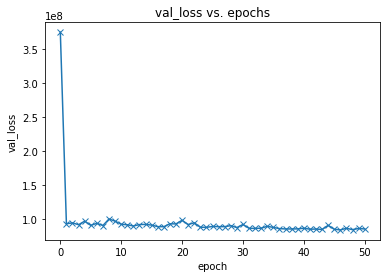

In [29]:
losses = [r["val_loss"] for r in [result] + history5]
plt.plot(losses, "-x")
plt.xlabel("epoch")
plt.ylabel("val_loss")
plt.title("val_loss vs. epochs");